# Preprocess PDF documents

## Load PDF files

In [1]:
from langchain.document_loaders import PyPDFium2Loader, PyPDFLoader, PDFMinerLoader, UnstructuredPDFLoader

In [2]:
# filepaths = ["docs/computer-security-note--section2.1-2.3.pdf"]
# filepaths = ["docs/computer-security-note--p17.pdf"]
# filepaths = ["docs/computer-security-note--section2.pdf"]
# filepaths = ["docs/computer-security-principles-practice-4th-global.pdf"]
filepaths = ["docs/computer-security-principles-practice-4th-global_part1-2.pdf"]
# filepaths = ["docs/computer-security-note--section2.1-2.3.pdf", "docs/computer-security-note--section2.pdf", "docs/computer-security-note.pdf", "docs/computer-security-principles-practice-4th-global.pdf"]

### Create tempfile copy for streamlit

In [ ]:
# import tempfile

# tempt_dir = tempfile.TemporaryDirectory()
# print(f"Temporary directory: {tempt_dir.name}")

### Experiments on different PDF loader

In [3]:
# loader1 = PyPDFium2Loader(filepaths[0])
# data1 = loader1.load()
# data1[0]

In [4]:
# loader2 = PyPDFLoader(filepaths[0])
# data2 = loader2.load()
# data2[0]

In [5]:
# loader3 = PDFMinerLoader(filepaths[0])
# data3 = loader3.load()
# data3[0]

In [6]:
# loader4 = UnstructuredPDFLoader(filepaths[0])
# data4 = loader4.load()
# data4[0]

In [7]:
# loader5 = UnstructuredPDFLoader(filepaths[0], mode="elements")
# data5 = loader5.load()
# data5[0]

In [8]:
# len(data1), len(data4)

In [9]:
# data1[0], data4[0]

In [10]:
# len(data1), len(data2), len(data3), len(data4), len(data5)

In [11]:
# data1[0]

In [12]:
# data2[0]

In [13]:
# data3[0]

In [14]:
# data4[0]

In [15]:
# data5[:5]

**Fastest: langchain.document_loaders.PyPDFium2Loader**

**Slowest: langchain.document_loaders.UnstructuredPDFLoader (mode="single)**

**Best: langchain.document_loaders.UnstructuredPDFLoader (mode="single)**

### Use PyPDFium2Loader

In [3]:
from langchain.docstore.document import Document

pdfs = []
for filepath in filepaths:
    print(f"Processing {filepath}...")
    loader = PyPDFium2Loader(filepath)
    pages = loader.load()
    print(f"Loaded {len(pages)} pages.")
    pages = [page for page in pages if page.page_content]
    pages = [Document(page_content="\n\n".join([page.page_content for page in pages]), metadata=pages[0].metadata)]
    pdfs += pages
print(f"Total {len(pdfs)} pages.")

Processing docs/computer-security-principles-practice-4th-global_part1-2.pdf...
Loaded 457 pages.
Total 1 pages.


In [4]:
print(pdfs[0])
print(type(pdfs[0]))

page_content='23\r\n1.1 Computer Security Concepts\r\nA Definition of Computer Security\r\nExamples\r\nThe Challenges of Computer Security\r\nA Model for Computer Security\r\n1.2 Threats, Attacks, and Assets\r\nThreats and Attacks\r\nThreats and Assets\r\n1.3 Security Functional Requirements\r\n1.4 Fundamental Security Design Principles\r\n1.5 Attack Surfaces and Attack Trees\r\nAttack Surfaces\r\nAttack Trees\r\n1.6 Computer Security Strategy\r\nSecurity Policy\r\nSecurity Implementation\r\nAssurance and Evaluation\r\n1.7 Standards\r\n1.8 Key Terms, Review Questions, and Problems\r\nOverview\r\nCHAPTER\r\nM01_STAL0611_04_GE_C01.indd 23 10/10/17 9:22 PM\n\n\n24 CHAPTER 1 / OVERVIEW\r\nThis chapter provides an overview of computer security. We begin with a discussion \r\nof what we mean by computer security. In essence, computer security deals with \r\ncomputer-related assets that are subject to a variety of threats and for which various \r\nmeasures are taken to protect those assets. A

In [5]:
# from langchain.docstore.document import Document

# pdfs = Document(page_content="\n\n".join([page.page_content for page in pdfs]), metadata=pdfs[0].metadata)
# print(pdfs)

### Use UnstructuredPDFLoader

In [6]:
pdfs = []
for filepath in filepaths:
    print(f"Processing {filepath}...")
    loader = UnstructuredPDFLoader(filepath)
    pages = loader.load()
    print(f"Loaded {len(pages)} pages.")
    pdfs += pages
print(f"Total {len(pdfs)} pages.")

Processing docs/computer-security-principles-practice-4th-global_part1-2.pdf...


In [17]:
# print(pdfs[0])

page_content='Chapter 2\n\nIdentiﬁcation and authentication\n\n2.1\n\nIntroduction\n\nIn this chapter, we will consider why identiﬁcation is an extremely important aspect of computer security and look at some methods that can be implemented in order to identify computer users. We will also consider the ways in which an identiﬁcation system can be abused and methods that can be used to minimise the threats to security.\n\nSupplementary reading\n\nChapter 2 of Computer security by Gollmann is a good introduction to identiﬁcation and authentication. Do an Internet search on password crackers. Analysis of a password cracking program will give you an insight on how\n\nfast these programs run and the size of the dictionaries that they use.\n\nAfter studying this chapter and the recommended reading, you should be able to:\n\nshow familiarity with the concepts of identiﬁcation and authentication describe how a user-name/password system works understand that a user may prove their identity usin

## Load Microsoft doc

In [43]:
from langchain_community.document_loaders import Docx2txtLoader, UnstructuredWordDocumentLoader

filepath = "docs/FaceAlignmentReport.docx"
loader = Docx2txtLoader(filepath)
pages = loader.load()
print(f"Loaded {len(pages)} pages.")
print(pages[0])

Loaded 1 pages.
page_content="Face Alignment on 44 landmarks by Cascade Model\n\n\n\n\n\n\n\n\n\n\n\nCandidate No.: 263156\n\nMay 2023\n\nUniversity of Sussex\n\n\n\n\n\n\n\n\n\n\n\n\n\nAbstract\n\nFace alignment, also known as face key point detection, is the basis for many face-related tasks such as face detection, expression analysis, etc. It detects a predefined set of face key points (e.g. eyes, eyebrows, nose, mouth etc.) for a given face. It is the task of detecting a pre-defined set of face key points (e.g. eyes, eyebrows, nose, mouth, etc.) for a given face. This report uses a cascade model to perform 44 face keypoint detection. It also covers some attempts to improve the performance of simple CNN models and some analysis of failure cases. \n\n\n\n\n\n\n\n\nIntroduction\n\nFace key points can reflect some critical features of the face and are essential for face-related machine-learning tasks. The training dataset for this assignment is divided into two parts, a full 44-keypoin

In [44]:
filepath = "docs/FaceAlignmentReport.docx"
loader = UnstructuredWordDocumentLoader(filepath)
pages = loader.load()
print(f"Loaded {len(pages)} pages.")
print(pages[0])

Loaded 1 pages.
page_content="Face Alignment on 44 landmarks by Cascade Model\n\nCandidate No.: 263156\n\nMay 2023\n\nUniversity of Sussex\n\nAbstract\n\nFace alignment, also known as face key point detection, is the basis for many face-related tasks such as face detection, expression analysis, etc. It detects a predefined set of face key points (e.g. eyes, eyebrows, nose, mouth etc.) for a given face. It is the task of detecting a pre-defined set of face key points (e.g. eyes, eyebrows, nose, mouth, etc.) for a given face. This report uses a cascade model to perform 44 face keypoint detection. It also covers some attempts to improve the performance of simple CNN models and some analysis of failure cases. \n\nIntroduction\n\nFace key points can reflect some critical features of the face and are essential for face-related machine-learning tasks. The training dataset for this assignment is divided into two parts, a full 44-keypoint face keypoint dataset and a missing dataset with only fi

## Load txt file

In [47]:
from langchain_community.document_loaders import TextLoader, UnstructuredFileLoader

filepath = "docs/FaceAlignmentReport.txt"
loader = TextLoader(filepath)
pages = loader.load()
print(f"Loaded {len(pages)} pages.")
print(pages[0])

Loaded 1 pages.
page_content="Face Alignment on 44 landmarks by Cascade Model\n\n\n\n\n\nCandidate No.: 263156\nMay 2023\nUniversity of Sussex\n\n\n\n\n\n\nAbstract\nFace alignment, also known as face key point detection, is the basis for many face-related tasks such as face detection, expression analysis, etc. It detects a predefined set of face key points (e.g. eyes, eyebrows, nose, mouth etc.) for a given face. It is the task of detecting a pre-defined set of face key points (e.g. eyes, eyebrows, nose, mouth, etc.) for a given face. This report uses a cascade model to perform 44 face keypoint detection. It also covers some attempts to improve the performance of simple CNN models and some analysis of failure cases. \n\n\n\x0cIntroduction\nFace key points can reflect some critical features of the face and are essential for face-related machine-learning tasks. The training dataset for this assignment is divided into two parts, a full 44-keypoint face keypoint dataset and a missing data

In [48]:
filepath = "docs/FaceAlignmentReport.txt"
loader = UnstructuredFileLoader(filepath)
pages = loader.load()
print(f"Loaded {len(pages)} pages.")
print(pages[0])

Loaded 1 pages.
page_content="Face Alignment on 44 landmarks by Cascade Model\n\nCandidate No. : 263156\n\nMay 2023\n\nUniversity of Sussex\n\nAbstract Face alignment, also known as face key point detection, is the basis for many face-related tasks such as face detection, expression analysis, etc. It detects a predefined set of face key points (e.g. eyes, eyebrows, nose, mouth etc.) for a given face. It is the task of detecting a pre-defined set of face key points (e.g. eyes, eyebrows, nose, mouth, etc.) for a given face. This report uses a cascade model to perform 44 face keypoint detection. It also covers some attempts to improve the performance of simple CNN models and some analysis of failure cases.\n\nIntroduction Face key points can reflect some critical features of the face and are essential for face-related machine-learning tasks. The training dataset for this assignment is divided into two parts, a full 44-keypoint face keypoint dataset and a missing dataset with only five key

## Transcript Audio to text

In [28]:
# import openai
# file uploads limited to 25MB for OpenAI Whisper v2 API, so we use Whisper v1 here
# audio = 

import whisper

# model = whisper.load_model("base.en")
# result = model.transcribe("./docs/lecture3_part2.mp4")
model = whisper.load_model("large-v2")
result = model.transcribe("./docs/lecture3_part2.mp4", language="en")
print(result["text"])

/Users/haoxu/anaconda3/lib/python3.11/site-packages/whisper/transcribe.py:115: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 Hi, and welcome back to the week three lecture, where we're talking about N-gram language modelling. In this part, we're going to be talking about generalisation in the models. So we're going to start by thinking about our models and how we might use them to generate previously unseen language. To do that, what I want us to do is consider a very, very small toy bigram model, which we might imagine has been trained on this very, very small corpus here. Just three sentences here, just to get us to think about what these models might look like. And so we can represent these models as a kind of table or matrix. And here we have word one, and here we have word two. If this was a trigram model, we could actually here have the two previous words, or a quadricam, the three previous words. But here, what I'm imagining is this table is a bigram model, and it's telling us the probability of word two, that's the word along here, given that the previous word was word one. And we have this thing ca

In [29]:
len(result["text"])

28191

len for large-v3: 28191 cost 28m12.2s on cpu

len for base.en: 27673 cost 1m42.2s on cpu

### Check Whisper Output

In [47]:
import os
from whisper.normalizers import EnglishTextNormalizer

basefile = open("outputs/Whisper-baseEN.txt", "r")
largefile = open("outputs/Whisper-largev2.txt", "r")

base_text = basefile.read()
large_text = largefile.read()

basefile.close()
largefile.close()

normalizer = EnglishTextNormalizer()

base_text = normalizer(base_text)
large_text = normalizer(large_text)

base_text = base_text.split(".")
large_text = large_text.split(".")

assert len(base_text) == len(large_text), f"{len(base_text)} != {len(large_text)}"

len(base_text), len(large_text)

i = 0

In [48]:
print(f"B: {base_text[i]}")
print(f"L: {large_text[i]}")
print()

i += 1

B: hi and welcome back to the week 3 lecture where we are talking about language modeling in this part we are going to be talking about generalization in the models we are going to start by thinking about models and how we might use them to generate previously unseen language to do that what i want us to do is consider a very very small toy by ground model which we might imagine has been trained on this very very small corpus here just 3 sentences here just to get us to think about what these models might look like and so we can represent these models as a kind of table or matrix and here we have word one and here we have word 2 if this was a trigram model we could actually here have the 2 previous words or a quadric of the 3 previous words but here what i am imagining is this table is a by ground model and it is telling us the probability of word 2 that is the word along here and given that the previous word was word one and we have this thing called a start token and we have an end t

base model output: 

Hi and welcome back to the week 3 lecture where we're talking about ***n-gram (missing)*** language modeling. In this part we're going to be talking about generalization in the models. We're going to start by thinking about ***our (missing-not sure)*** models and how we might use them to generate previously unseen language. To do that what I want us to do is consider a very very small toy ***by-ground (bigram)*** model which we might imagine has been trained on this very very small corpus here, just three sentences here just to get us to think about what these models might look like. And so we can represent these models as a kind of table or matrix. And here we have word one and here we have word two. 

large-v2 model output: 

Hi, and welcome back to the week three lecture, where we're talking about N-gram language modelling. In this part, we're going to be talking about generalisation in the models. ***So (too sensitive)*** we're going to start by thinking about our models and how we might use them to generate previously unseen language. To do that, what I want us to do is consider a very, very small toy bigram model, which we might imagine has been trained on this very, very small corpus here. Just three sentences here, just to get us to think about what these models might look like. And so we can represent these models as a kind of table or matrix. And here we have word one, and here we have word two. 

The large-v2 model didn't make the mistakes that base model did. 

## Test performance on public dataset: LibriSpeech test clean

[Test model in Colab cause need GPU and not support mps, the codes pls look at the link. ](https://colab.research.google.com/drive/1qGQbPkOizMdeHC6ow0qlvRizXZwleO_f?usp=sharing)

The base.en model got WER: 4.26 %, large-v2 got WER: 2.65 %, large-v3 got WER: 2.03%

In the paper, Whisper Large V2 got WER of 2.7% on LibriSpeech test clean similar to wev2vec 2.0 and base.en got WER of 4.2%. 

<img src="figures/WhisperPerformance-compareWithHuman.png" width="800px"/>

The Whisper paper said the model performance is very close to human level transcription

## Chunck docs to small documents

In [6]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [7]:
chunk_size = 20000
chunk_overlap = 1000

# chunk_size = 8000
# chunk_overlap = 400

text_splitter = RecursiveCharacterTextSplitter(separators=["\n\n", "\n", "\t"], chunk_size=chunk_size, chunk_overlap=chunk_overlap)
docs = text_splitter.split_documents(pdfs)

In [8]:
print(f"Document count: {len(docs)}")
# print(docs[0])

Document count: 68


In [9]:
docs[0].metadata

{'source': 'docs/computer-security-principles-practice-4th-global_part1-2.pdf',
 'page': 0}

In [10]:
print(docs[0])

page_content='23\r\n1.1 Computer Security Concepts\r\nA Definition of Computer Security\r\nExamples\r\nThe Challenges of Computer Security\r\nA Model for Computer Security\r\n1.2 Threats, Attacks, and Assets\r\nThreats and Attacks\r\nThreats and Assets\r\n1.3 Security Functional Requirements\r\n1.4 Fundamental Security Design Principles\r\n1.5 Attack Surfaces and Attack Trees\r\nAttack Surfaces\r\nAttack Trees\r\n1.6 Computer Security Strategy\r\nSecurity Policy\r\nSecurity Implementation\r\nAssurance and Evaluation\r\n1.7 Standards\r\n1.8 Key Terms, Review Questions, and Problems\r\nOverview\r\nCHAPTER\r\nM01_STAL0611_04_GE_C01.indd 23 10/10/17 9:22 PM\n\n\n24 CHAPTER 1 / OVERVIEW\r\nThis chapter provides an overview of computer security. We begin with a discussion \r\nof what we mean by computer security. In essence, computer security deals with \r\ncomputer-related assets that are subject to a variety of threats and for which various \r\nmeasures are taken to protect those assets. A

## Embed text

In [11]:
from dotenv import load_dotenv
load_dotenv()

True

In [12]:
from langchain_openai import OpenAI
from langchain_openai import OpenAIEmbeddings
from langchain_community.embeddings import HuggingFaceInstructEmbeddings
from langchain.vectorstores import FAISS, Chroma

In [13]:
embeddings = OpenAIEmbeddings()
# embeddings = HuggingFaceInstructEmbeddings(model_name="hkunlp/instructor-xl")

In [14]:
from langchain_openai import OpenAI

llm = OpenAI()
# llm.get_num_tokens(" ".join([x.page_content for x in docs]))
print(f"Total characters: {len(' '.join([x.page_content for x in docs]))}")
print(f"Total tokens: {llm.get_num_tokens(' '.join([x.page_content for x in docs]))}")

Total characters: 1273801
Total tokens: 274274


    PyPDFium2Loader:

Total characters: 20006

Total tokens: 4177

    UnstructuredPDFLoader:

Total characters: 19592

Total tokens: 4095

In [15]:
import os
from langchain_community.callbacks import get_openai_callback

# vectors = embeddings.embed_documents([x.page_content for x in docs])
# print(f"Vector count: {len(vectors)}")
# db = Chroma.from_documents(docs, embedding=embeddings)

if not os.path.exists(os.path.join(os.getcwd(), "vectorstores")):
    os.makedirs(os.path.join(os.getcwd(), "vectorstores"))
with get_openai_callback() as cb:
    # db = Chroma.from_documents(persist_directory="./vectorstores", documents=docs, embedding=embeddings)
    db = Chroma.from_documents(documents=docs, embedding=embeddings)
    print("Callback:\n", cb)

Callback:
 Tokens Used: 0
	Prompt Tokens: 0
	Completion Tokens: 0
Successful Requests: 0
Total Cost (USD): $0.0


# Interact with LLM

## Load LLM

I have tried to run llama2 through llama.cpp on Mac, but it works worse than GPT. It has limits of 4096 tokens which is much smaller than GPT. The only way to increase the token limitation is to pretrain the llama2 model with larger context window which is too expensive and not feasible

Output for "Write a python program to calculate the factorial of a number."

GPT3.5 output:
    content='Here\'s a simple Python program to calculate the factorial of a number using a recursive function:\n\n```python\ndef factorial(n):\n    if n == 0 or n == 1:\n        return 1\n    else:\n        return n * factorial(n-1)\n\nnum = int(input("Enter a number: "))\nprint("Factorial of", num, "is", factorial(num))\n```\n\nWhen you run this program, it will prompt you to enter a number, then it will calculate and print the factorial of that number.'

Llama2-7B output (This is the best output after I tried several times): 
    Factorials are defined in terms of multiplication. The factorial of n is the product of all integers from 1 to n. For example, the factorial of 4 is the product of 1×2×3×4 or 24. The factorial of 5 is the product of 1×2×3×4×5 or 120. Factorials can be calculated using recursion as follows:

In [8]:
from langchain_openai import ChatOpenAI
from langchain_community.llms import HuggingFaceHub
from langchain_community.llms import LlamaCpp

# llm = ChatOpenAI(model_name='gpt-4-1106-preview')
llm = ChatOpenAI(model_name='gpt-3.5-turbo-1106')
# llm = HuggingFaceHub(repo_id="google/flan-t5-xxl", model_kwargs={"temperature":0.5, "max_length":512})
# llm = LlamaCpp(model_path="llama.cpp/models/llama2-13B/ggml-model-q4_0.bin", n_gpu_layers=4, n_batch=4096, f16_kv=True, n_ctx=4096)

# llm.get_num_tokens([x.page_content for x in docs])

llama_model_loader: loaded meta data with 16 key-value pairs and 363 tensors from llama.cpp/models/llama2-13B/ggml-model-q4_0.bin (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = LLaMA v2
llama_model_loader: - kv   2:                       llama.context_length u32              = 4096
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 5120
llama_model_loader: - kv   4:                          llama.block_count u32              = 40
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 13824
llama_model_loader: - kv   6:                 llama.rope.dimension_count u32              = 128
llama_model_loader: - kv   7:                 llama.attention.h

In [14]:
result = llm.invoke("Write a python program to calculate the factorial of a number.")

Llama.generate: prefix-match hit

llama_print_timings:        load time =   13737.17 ms
llama_print_timings:      sample time =      17.37 ms /    94 runs   (    0.18 ms per token,  5411.63 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time = 1231019.43 ms /    94 runs   (13095.95 ms per token,     0.08 tokens per second)
llama_print_timings:       total time = 1231703.36 ms /    95 tokens


In [15]:
print(result)


Factorials are defined in terms of multiplication. The factorial of n is the product of all integers from 1 to n. For example, the factorial of 4 is the product of 1×2×3×4 or 24. The factorial of 5 is the product of 1×2×3×4×5 or 120. Factorials can be calculated using recursion as follows:


## Langchain summarize chain to generate quiz

### Stuff

In [ ]:
from langchain.chains.summarize import load_summarize_chain
from langchain import PromptTemplate
from langchain.callbacks import get_openai_callback

# templete = """
# Extract key points which can help students revise from the following text delimited by triple backquotes.
# Return your response in bullet points which covers the key points of the text.
# ```{text}```
# BULLET POINT SUMMARY:
# """

templete = """
Using the content provided below from a PDF delimited by triple backquotes, 
please generate a multiple-choice test consisting of 3 questions to aid students in their review. 
Each question should be related to the key concepts, facts, or information in the text, and following the specific format below:
Begin each question with the word "Question" and a number, followed by a colon.
Then, provide the options for the question beginning with the word "Options" and a colon.
Ensure that for each question, there is one correct answer and three plausible but incorrect options. 
End each question with the word "Answer" and a colon, followed by the correct answer.

```{text}```
"""

prompt = PromptTemplate(
    input_variables=["text"],
    template=templete,
)

summary_chain = load_summarize_chain(llm, 
                                     chain_type="stuff", 
                                     prompt=prompt, 
                                     verbose=False)

In [ ]:
# summary_list = []
# for i, doc in enumerate(docs):
#     print(f"Processing document {i}...")
#     print(f"This doc has {llm.get_num_tokens(doc.page_content)} tokens.")
#     print(f"This doc has {len(doc.page_content)} characters. {len(doc.page_content) / llm.get_num_tokens(doc.page_content)} characters per token.")
#     with get_openai_callback() as cb:
#         chunk_summary = summary_chain.invoke([doc])
#         print(f"Callback: \n{cb}")
#     summary_list.append(chunk_summary)
#     print(f"Summary #{i} is: {chunk_summary}\n")
#     break

In [ ]:
print(f"Processing document ...")
print(f"This doc has {llm.get_num_tokens(pdfs[0].page_content)} tokens.")
print(f"This doc has {len(pdfs[0].page_content)} characters. {len(pdfs[0].page_content) / llm.get_num_tokens(pdfs[0].page_content)} characters per token.")
with get_openai_callback() as cb:
    summary = summary_chain.invoke(pdfs)
    print(f"Callback: \n{cb}")
print(f"Summary is: {summary}\n")

Processing document ...
This doc has 4394 tokens.
This doc has 17998 characters. 4.0960400546199365 characters per token.


ValueError: Requested tokens (4551) exceed context window of 512

In [ ]:
summary.keys()

dict_keys(['input_documents', 'output_text'])

In [33]:
len(summary['input_documents'][0].page_content), len(summary['output_text'])

(17791, 833)

In [70]:
from pprint import pprint

# pprint(summary['input_documents'][0].page_content)

In [35]:
pprint(summary['output_text'])

('Question 1: What is the purpose of a user-name in a computer system?\n'
 'Options: \n'
 'A) To establish authentication of identity\n'
 "B) To prove the user's identity using something they know\n"
 'C) To establish identity\n'
 'D) To prevent password guessing attacks\n'
 'Answer: C) To establish identity\n'
 '\n'
 "Question 2: What is a potential method for a hacker to find out a user's "
 'password?\n'
 'Options:\n'
 'A) Guessing using personal knowledge of the user\n'
 'B) Fake log-in screens\n'
 'C) Asking the user directly\n'
 'D) Phishing\n'
 'Answer: A) Guessing using personal knowledge of the user\n'
 '\n'
 'Question 3: What is a user and system defense to minimize the risk of a '
 'hacker getting hold of a password?\n'
 'Options:\n'
 'A) Limit log-in attempts\n'
 'B) Revealing the password to anyone\n'
 'C) Using the same password for all systems\n'
 'D) Leaving the password option as blank\n'
 'Answer: A) Limit log-in attempts')


    Prompt vs. Output

| Prompt | Output |
| --- | --- |
| Write a summary of the following text delimited by triple backquotes.<br>Return your response in bullet points which covers the key points of the text.<br>```{text}```<br>BULLET POINT SUMMARY: | '- Identification and authentication are important aspects of computer '<br> 'security\n'<br> '- Methods for identifying computer users and minimizing security threats are '<br> 'explored\n'<br> '- User-names and passwords are used for identification and authentication\n'<br> '- Different kinds of threats such as password guessing attacks, password '<br> 'spoofing attacks, and attacks on the password file are identified\n'<br> '- Measures to prevent or detect these attacks are discussed\n'<br> '- Different methods for identification and authentication are explored\n'<br> '- The importance of educating system users to choose strong passwords is '<br>'emphasized\n'<br> '- Ways to protect a password file and implement one-time passwords are '<br> 'discussed\n'<br> '- Various attacks on user-name/password identification systems are '<br> 'described, including password guessing, dictionary searching, intelligent '<br> 'searching, and exhaustive searching\n'<br> '- Password spoofing attacks, phishing, and user and system defenses are also '<br> 'covered.' |
|Extract key points which can help students revise from the following text delimited by triple backquotes.<br>Return your response in bullet points which covers the key points of the text.<br>```{text}```<br>BULLET POINT SUMMARY: | '- Identification and authentication are important aspects of computer '<br> 'security\n'<br> '- Methods for identifying computer users and minimizing security threats\n'<br> '- Familiarity with concepts of identification and authentication\n'<br> '- Understanding of different kinds of threats such as password guessing '<br> 'attacks, password spoofing attacks, and attacks on the password file\n'<br> '- Importance of educating system users to choose strong passwords\n'<br> '- Protection of password file using one-way function to encrypt passwords\n'<br> '- Implementation of one-time passwords to reduce the risk of password '<br> 'discovery\n'<br> '- Familiarity with alternative methods for identification and '<br> 'authentication\n'<br> '- Assessment of security needs when choosing a method for a given situation\n'<br> '- Two stages in the process of identification: establishing identity with a '<br> 'user-name and authenticating identity with a password\n'<br> '- Different ways a password can be guessed and defenses against these '<br> 'attacks\n'<br> '- Number of passwords and time it takes to guess them\n'<br> '- Password spoofing attacks and defenses against them\n'<br> '- User and system defenses to minimize the risk of a hacker getting hold of '<br> 'a password' |
| Using the content provided below from a PDF delimited by triple backquotes, <br>please generate a multiple-choice test consisting of 3 questions to aid students in their review. <br>Each question should be related to the key concepts, facts, or information in the text, and following the specific format below:<br>Begin each question with the word "Question" and a number, followed by a colon.<br>Then, provide the options for the question beginning with the word "Options" and a colon.<br>Ensure that for each question, there is one correct answer and three plausible but incorrect options. <br>End each question with the word "Answer" and a colon, followed by the correct answer.<br>```{text}``` | 'Question 1: What is the purpose of a user-name in a computer system?\n'<br> 'Options: \n'<br> 'A) To establish authentication of identity\n'<br> "B) To prove the user's identity using something they know\n"<br> 'C) To establish identity\n'<br> 'D) To prevent password guessing attacks\n'<br> 'Answer: C) To establish identity\n'<br> '\n'<br> "Question 2: What is a potential method for a hacker to find out a user's "<br> 'password?\n'<br> 'Options:\n'<br> 'A) Guessing using personal knowledge of the user\n'<br> 'B) Fake log-in screens\n'<br> 'C) Asking the user directly\n'<br> 'D) Phishing\n'<br> 'Answer: A) Guessing using personal knowledge of the user\n'<br> '\n'<br> 'Question 3: What is a user and system defense to minimize the risk of a '<br> 'hacker getting hold of a password?\n'<br> 'Options:\n'<br> 'A) Limit log-in attempts\n'<br> 'B) Revealing the password to anyone\n'<br>'C) Using the same password for all systems\n'<br> 'D) Leaving the password option as blank\n'<br> 'Answer: A) Limit log-in attempts' |

### Map Reduce

In [16]:
from langchain.chains.summarize import load_summarize_chain

print(f"We have {len(docs)} documents.")

We have 137 documents.


In [45]:
docs = docs[10:15]
print(f"We have {len(docs)} documents.")

We have 5 documents.


In [46]:
from langchain import PromptTemplate

map_prompt = """
Summarize the following text delimited by triple backquotes.
The summary should contain the key points of the text and help students revise.
```{text}```
"""

map_prompt_template = PromptTemplate(template=map_prompt, input_variables=["text"])

In [47]:
import re

n_questions = 3
combine_prompt = """
Using the summary provided below from a PDF delimited by triple backquotes,
please generate a multiple-choice test consisting of {n_questions} questions to aid students in their review. 
Each question should be related to the key concepts, facts, or information in the text, and following the specific format below:
Begin each question with the word "Question" and a number, followed by a colon.
Then, provide the options for the question beginning with the word "Options" and a colon.
Each option should begin with a letter (A, B, C, or D) followed by a period and a space.
Ensure that for each question, there is one correct answer and three plausible but incorrect options. 
End each question with the word "Answer" and a colon, followed by the correct answer.
    
```{text}```
"""
combine_prompt = re.sub(r"{n_questions}", str(n_questions), combine_prompt)
print(combine_prompt)
combine_prompt_template = PromptTemplate(template=combine_prompt, input_variables=["text"])


Using the content provided below from a PDF delimited by triple backquotes, 
please generate a multiple-choice test consisting of 3 questions to aid students in their review. 
Each question should be related to the key concepts, facts, or information in the text, and following the specific format below:
Begin each question with the word "Question" and a number, followed by a colon.
Then, provide the options for the question beginning with the word "Options" and a colon.
Each option should begin with a letter (A, B, C, or D) followed by a period and a space.
Ensure that for each question, there is one correct answer and three plausible but incorrect options. 
End each question with the word "Answer" and a colon, followed by the correct answer.
    
```{text}```



In [48]:
quiz_chain = load_summarize_chain(llm,
                                  chain_type="map_reduce",
                                  map_prompt=map_prompt_template,
                                  combine_prompt=combine_prompt_template,
                                  verbose=True)

In [49]:
from langchain_community.callbacks import get_openai_callback

with get_openai_callback() as cb:
    output = quiz_chain.invoke(docs)
    print(f"Callback: \n{cb}")



> Entering new MapReduceDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:

Summarize the following text delimited by triple backquotes.
The summary should contain the key points of the text and help students revise.
```Uniform distribution: The distribution of numbers in the sequence should be uniform; that is, the frequency of occurrence of each of the numbers should be approximately the same.

Independence: No one value in the sequence can be inferred from the others.

M02_STAL0611_04_GE_C02.indd 77

10/11/17 2:42 PM

78 ChaPTer 2 / CryPTograPhiC ToolS

Although there are well-defined tests for determining that a sequence of num- bers matches a particular distribution, such as the uniform distribution, there is no such test to “prove” independence. Rather, a number of tests can be applied to dem- onstrate if a sequence does not exhibit independence. The general strategy is to apply a number of such tests until the confidence that independence exist

In [50]:
print(output.keys())
print(output['output_text'])

dict_keys(['input_documents', 'output_text'])
Question 1: What are the principles of digital user authentication discussed in the text?
Options: 
A. Random and pseudorandom numbers 
B. Importance of independence in sequences 
C. Something the individual knows, possesses, is, and does 
D. Use of multifactor authentication for enhanced security
Answer: C. Something the individual knows, possesses, is, and does

Question 2: What are the vulnerabilities of password-based authentication highlighted in the text?
Options: 
A. Use of memory cards and smart cards 
B. Hashed passwords and salt values 
C. The need for complex password policies to prevent password cracking 
D. Use of multifactor authentication for enhanced security
Answer: C. The need for complex password policies to prevent password cracking

Question 3: What are the functions of electronic identity (eID) cards mentioned in the text?
Options: 
A. Microprocessor, memory, and I/O ports 
B. Use of multifactor authentication for enha

The text discusses the characteristics of a uniform distribution of numbers, the importance of independence in sequences, the use of random sequences for cryptography, the difference between random and pseudorandom numbers, and practical applications of encryption for stored data. It also includes review questions and problems related to these topics.

The text discusses the principles of digital user authentication and the means of authenticating a user's identity. It introduces the concept of assurance level, potential impact, and areas of risk in the context of user authentication. The text also provides an overview of different means of user authentication, including something the individual knows, possesses, is, and does. Additionally, it mentions the use of multifactor authentication for enhanced security. The chapter emphasizes the importance of user authentication as the fundamental building block of computer security and the primary line of defense. It also introduces a model for digital user authentication and discusses the different levels of assurance and potential impact.

The text provides information on user authentication, focusing on password-based authentication. It discusses the vulnerability of passwords and various attack strategies and countermeasures. The use of hashed passwords and salt values, as well as the implementation of the UNIX password scheme, are explained. The text also delves into the effectiveness of password cracking, using examples of successful guessing strategies. Overall, the text highlights the security vulnerabilities of passwords and the need for stronger authentication techniques.

The text discusses various strategies and techniques for password-based authentication, as well as the use of tokens for user authentication. It highlights the vulnerabilities of password-based authentication and the need for complex password policies to prevent password cracking. The text also explains the use of memory cards and smart cards as tokens for user authentication, discussing their physical characteristics and potential drawbacks.

Smart tokens, including smart cards, have physical characteristics, user interface, electronic interface, and authentication protocols. Smart cards contain a microprocessor, memory, and I/O ports, and can be used for authentication. Electronic identity (eID) cards have functions for government and commercial use, and use biometric authentication for user verification. Biometric authentication uses physical characteristics like facial features, fingerprints, hand geometry, retinal and iris patterns, and voice to authenticate individuals. Biometric systems enroll users, verify their identity, and identify unknown users using matching scores. The false match rate and false nonmatch rate determine the accuracy of biometric authentication.

In [51]:
questions_list = [{"question": re.split(r"\nOptions:", q)[0],
                    "options": re.split(r"\n([A, B, C, D])", re.split(r"\nAnswer: ", re.split(r'Options:', q)[1])[0]),
                    "answer": re.split(r"\nAnswer:", q)[1]}
                    for q in re.split(r'Question \d+: ', output['output_text']) if q != ""]
questions_list = [{"question": q["question"], "options": ["".join(x).strip() for x in zip(q["options"][1::2], q["options"][2::2])], "answer": q["answer"].strip()} for q in questions_list]

In [52]:
questions_list

[{'question': 'What are the principles of digital user authentication discussed in the text?',
  'options': ['A. Random and pseudorandom numbers',
   'B. Importance of independence in sequences',
   'C. Something the individual knows, possesses, is, and does',
   'D. Use of multifactor authentication for enhanced security'],
  'answer': 'C. Something the individual knows, possesses, is, and does'},
 {'question': 'What are the vulnerabilities of password-based authentication highlighted in the text?',
  'options': ['A. Use of memory cards and smart cards',
   'B. Hashed passwords and salt values',
   'C. The need for complex password policies to prevent password cracking',
   'D. Use of multifactor authentication for enhanced security'],
  'answer': 'C. The need for complex password policies to prevent password cracking'},
 {'question': 'What are the functions of electronic identity (eID) cards mentioned in the text?',
  'options': ['A. Microprocessor, memory, and I/O ports',
   'B. Use

## TODO: Cluster

When using cluster to generate quiz with GPT3.5 without map reduce, there is limitation of 16k for the token. For GPT 4 is 128k, but it is too expensive. 

Template length is about 700. 

(num_clusters * chunk_size + 700) / 4 < 16,000

num_clusters * chunck_size < 63,300

In [17]:
db.get().keys()

dict_keys(['ids', 'embeddings', 'metadatas', 'documents', 'uris', 'data'])

In [18]:
vectors = db.get(include=["embeddings"])["embeddings"]
documents = db.get()["documents"]
print(f"Embeddings count: {len(vectors)}")
print(f"Documents count: {len(documents)}")

Embeddings count: 68
Documents count: 68


In [19]:
import numpy as np
from sklearn.cluster import KMeans

vectors = np.array(vectors)

num_clusters = 10
if num_clusters*chunk_size >  63_000:
    num_clusters = 63_000 // chunk_size
    print(f"The number of clusters is too large which will exceeding the GPT 3.5 limitation of 16k. The number of clusters is set to {num_clusters}.")
else:
    print(f"The number of clusters is set to {num_clusters}.")

kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(vectors)
labels_dict = {index:label for index, label in enumerate(kmeans.labels_)}
print(labels_dict)

The number of clusters is too large which will exceeding the GPT 3.5 limitation of 16k. The number of clusters is set to 3.


/Users/haoxu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 2, 26: 2, 27: 2, 28: 2, 29: 2, 30: 2, 31: 2, 32: 2, 33: 2, 34: 2, 35: 2, 36: 2, 37: 2, 38: 2, 39: 2, 40: 2, 41: 2, 42: 2, 43: 2, 44: 2, 45: 2, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 0, 57: 1, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0}


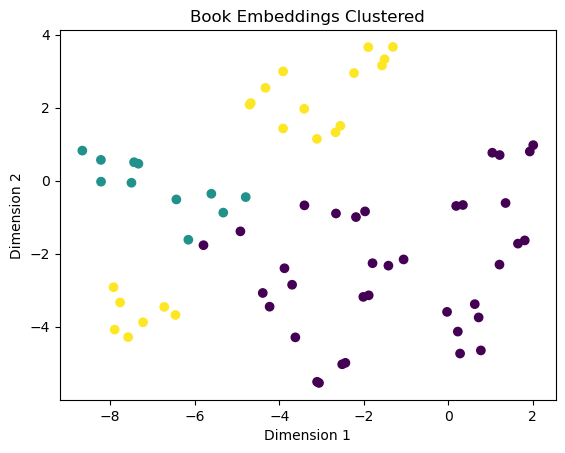

In [20]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Taking out the warnings
import warnings
from warnings import simplefilter

# Filter out FutureWarnings
simplefilter(action='ignore', category=FutureWarning)

# Perform t-SNE and reduce to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
reduced_data_tsne = tsne.fit_transform(vectors)

# Plot the reduced data
plt.scatter(reduced_data_tsne[:, 0], reduced_data_tsne[:, 1], c=kmeans.labels_)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Book Embeddings Clustered')
plt.show()

In [21]:
# Find the closest embeddings to the centroids

# Create an empty list that will hold your closest points
closest_indices = []

# Loop through the number of clusters you have
for i in range(num_clusters):
    
    # Get the list of distances from that particular cluster center
    distances = np.linalg.norm(vectors - kmeans.cluster_centers_[i], axis=1)
    
    # Find the list position of the closest one (using argmin to find the smallest distance)
    closest_index = np.argmin(distances)
    
    # Append that position to your closest indices list
    closest_indices.append(closest_index)

# Print the indices of the closest embeddings to the centroids
print(f"closest_indices: {closest_indices}")
print(f"labels_dict: {labels_dict}")
print(f"labels: {[labels_dict[index] for index in closest_indices]}")

closest_indices: [60, 49, 31]
labels_dict: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 2, 26: 2, 27: 2, 28: 2, 29: 2, 30: 2, 31: 2, 32: 2, 33: 2, 34: 2, 35: 2, 36: 2, 37: 2, 38: 2, 39: 2, 40: 2, 41: 2, 42: 2, 43: 2, 44: 2, 45: 2, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 0, 57: 1, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0}
labels: [0, 1, 2]


In [22]:
selected_indices = sorted(closest_indices)
selected_indices

[31, 49, 60]

In [23]:
from langchain.docstore.document import Document

print(type(documents[0]))
selected_docs = [Document(page_content=documents[index]) for index in selected_indices]

<class 'str'>


In [24]:
import re
from langchain.chains.summarize import load_summarize_chain
from langchain import PromptTemplate
from langchain.callbacks import get_openai_callback

n_questions = 5
if len(selected_docs) < n_questions:
    n_questions = len(selected_docs)
    print(f"The number of questions is larger than the number of clusters, so we will use {n_questions} questions.")
else:
    print(f"The number of questions is {n_questions}.")

# templete = """
# Extract key points which can help students revise from the following text delimited by triple backquotes.
# Return your response in bullet points which covers the key points of the text.
# ```{text}```
# BULLET POINT SUMMARY:
# """

template = """
Using the content provided below from a PDF delimited by triple backquotes, 
please generate a multiple-choice test consisting of {n_questions} questions to aid students in their review. 
Each question should be related to the key concepts, facts, or information in the text, and following the specific format below:
Begin each question with the word "Question" and a number, followed by a colon.
Then, provide the options for the question beginning with the word "Options" and a colon.
Ensure that for each question, there is one correct answer and three plausible but incorrect options. 
End each question with the word "Answer" and a colon, followed by the correct answer.

```{text}```
"""
# print(f"lem template: {len(template)}")
template = re.sub(r"{n_questions}", str(n_questions), template)

prompt = PromptTemplate(
    input_variables=["text"],
    template=template,
)

summary_chain = load_summarize_chain(llm, 
                                     chain_type="stuff", 
                                     prompt=prompt, 
                                     verbose=False)

The number of questions is larger than the number of clusters, so we will use 3 questions.


In [25]:
print(f"Processing document ...")
print(f"This doc has {llm.get_num_tokens(selected_docs[0].page_content)} tokens.")
print(f"This doc has {len(selected_docs[0].page_content)} characters. {len(selected_docs[0].page_content) / llm.get_num_tokens(selected_docs[0].page_content)} characters per token.")
with get_openai_callback() as cb:
    summary = summary_chain.invoke(selected_docs)
    print(f"Callback: \n{cb}")
print(f"Summary is: {summary}\n")

Processing document ...
This doc has 4000 tokens.
This doc has 18082 characters. 4.5205 characters per token.


Callback: 
Tokens Used: 11889
	Prompt Tokens: 11659
	Completion Tokens: 230
Successful Requests: 1
Total Cost (USD): $0.012119000000000001
Summary is: {'input_documents': [Document(page_content='240 CHAPTER 6 / MALICIOUS SOFTWARE\r\nvirtualized environment, and suppresses malicious behavior if so. Other malware \r\nincludes extended sleep periods before engaging in malicious activity, in an attempt \r\nto evade detection before the analysis terminates. Or the malware may include a logic \r\nbomb looking for a specific date, or specific system type or network location before \r\nengaging in malicious activity, which the sandbox environment does not match. In \r\nresponse, analysts adapt their sandbox environments to attempt to evade these tests. \r\nThis race continues.\r\nHOST-BASED DYNAMIC MALWARE ANALYSIS Unlike heuristics or fingerprint-based \r\nscanners, dynamic malware analysis or behavior-blocking software integrates with the \r\noperating system of a host computer and monitors 

In [26]:
print(summary['output_text'])

Question 1: What is the purpose of the TCP Wrappers library and tcpd daemon on Unix and Linux systems?
Options:
A. To manage user accounts and groups
B. To encrypt and secure data in transit
C. To provide access controls for network services
D. To create backups and archives of system data
Answer: C. To provide access controls for network services

Question 2: How does Stackguard protect against stack overflow attacks on Unix and Linux systems?
Options:
A. By encrypting sensitive data stored in memory
B. By disabling the execution of code on the stack
C. By monitoring and analyzing system logs
D. By preventing unauthorized access to system resources
Answer: B. By disabling the execution of code on the stack

Question 3: What is the purpose of the /etc/passwd and /etc/group files on Unix and Linux systems?
Options:
A. To store system log files
B. To manage network firewall settings
C. To configure user accounts and group membership
D. To control access to encrypted files and directories

## Process the Quiz output

In [130]:
import re

summary['output_text']

"Question 1: What is the purpose of a user-name in a computer system?\nOptions: \nA) To establish authentication of identity\nB) To prove the user's identity using something they know\nC) To establish identity\nD) To prevent password guessing attacks\nAnswer: C) To establish identity\n\nQuestion 2: What is a potential method for a hacker to find out a user's password?\nOptions:\nA) Guessing using personal knowledge of the user\nB) Fake log-in screens\nC) Asking the user directly\nD) Phishing\nAnswer: A) Guessing using personal knowledge of the user\n\nQuestion 3: What is a user and system defense to minimize the risk of a hacker getting hold of a password?\nOptions:\nA) Limit log-in attempts\nB) Revealing the password to anyone\nC) Using the same password for all systems\nD) Leaving the password option as blank\nAnswer: A) Limit log-in attempts"

In [131]:
re.split(r'Question \d+: ', summary['output_text'])

['',
 "What is the purpose of a user-name in a computer system?\nOptions: \nA) To establish authentication of identity\nB) To prove the user's identity using something they know\nC) To establish identity\nD) To prevent password guessing attacks\nAnswer: C) To establish identity\n\n",
 "What is a potential method for a hacker to find out a user's password?\nOptions:\nA) Guessing using personal knowledge of the user\nB) Fake log-in screens\nC) Asking the user directly\nD) Phishing\nAnswer: A) Guessing using personal knowledge of the user\n\n",
 'What is a user and system defense to minimize the risk of a hacker getting hold of a password?\nOptions:\nA) Limit log-in attempts\nB) Revealing the password to anyone\nC) Using the same password for all systems\nD) Leaving the password option as blank\nAnswer: A) Limit log-in attempts']

In [148]:
Questions_list = [{"Questions": re.split(r"\nOptions:", q)[0], 
              "Options": re.split(r"\n([A, B, C, D])", re.split(r"\nAnswer: ", re.split(r'Options:', q)[1])[0]), 
              "Answer": re.split(r"\nAnswer:", q)[1]} 
              for q in re.split(r'Question \d+: ', summary['output_text']) if q != ""]
Questions_list

[{'Questions': 'What is the purpose of a user-name in a computer system?',
  'Options': [' ',
   'A',
   ') To establish authentication of identity',
   'B',
   ") To prove the user's identity using something they know",
   'C',
   ') To establish identity',
   'D',
   ') To prevent password guessing attacks'],
  'Answer': ' C) To establish identity\n\n'},
 {'Questions': "What is a potential method for a hacker to find out a user's password?",
  'Options': ['',
   'A',
   ') Guessing using personal knowledge of the user',
   'B',
   ') Fake log-in screens',
   'C',
   ') Asking the user directly',
   'D',
   ') Phishing'],
  'Answer': ' A) Guessing using personal knowledge of the user\n\n'},
 {'Questions': 'What is a user and system defense to minimize the risk of a hacker getting hold of a password?',
  'Options': ['',
   'A',
   ') Limit log-in attempts',
   'B',
   ') Revealing the password to anyone',
   'C',
   ') Using the same password for all systems',
   'D',
   ') Leaving the

In [149]:
Questions_list = [{"Questions": q["Questions"], "Options": ["".join(x).strip() for x in zip(q["Options"][1::2], q["Options"][2::2])], "Answer": q["Answer"].strip()} for q in Questions_list]

In [150]:
Questions_list

[{'Questions': 'What is the purpose of a user-name in a computer system?',
  'Options': ['A) To establish authentication of identity',
   "B) To prove the user's identity using something they know",
   'C) To establish identity',
   'D) To prevent password guessing attacks'],
  'Answer': 'C) To establish identity'},
 {'Questions': "What is a potential method for a hacker to find out a user's password?",
  'Options': ['A) Guessing using personal knowledge of the user',
   'B) Fake log-in screens',
   'C) Asking the user directly',
   'D) Phishing'],
  'Answer': 'A) Guessing using personal knowledge of the user'},
 {'Questions': 'What is a user and system defense to minimize the risk of a hacker getting hold of a password?',
  'Options': ['A) Limit log-in attempts',
   'B) Revealing the password to anyone',
   'C) Using the same password for all systems',
   'D) Leaving the password option as blank'],
  'Answer': 'A) Limit log-in attempts'}]

: 

## Generate Feedback for large documents with RAG chain

In [33]:
import re
from langchain.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

question = {"question": "What are the functions of electronic identity (eID) cards mentioned in the text?", 
            "options": ["A. Microprocessor, memory, and I/O ports",
                        "B. Use of multifactor authentication for enhanced security",
                        "C. Biometric authentication for user verification",
                        "D. False match rate and false nonmatch rate determine the accuracy of biometric authentication"],
            "answer": "B. Use of multifactor authentication for enhanced security"}
user_answer = "A. Microprocessor, memory, and I/O ports"

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

retriever = db.as_retriever()
template = """
Using the content provided below from a PDF delimited by triple backquotes,
please provide feedback on the user's answer to the question below.

Question: {question}
Options: {options}
Correct answer: {answer}
User's answer: {user_answer}

The feedback should be related to the key concepts, facts, or information in the text.

```{context}```

Feedback:
"""

template = re.sub(r"{question}", question["question"], template)
template = re.sub(r"{options}", "; ".join(question["options"]), template)
template = re.sub(r"{answer}", question["answer"], template)
# template = re.sub(r"{user_answer}", user_answer, template)
print(f"Using template for feedback: \n{template}")

custom_rag_prompt = PromptTemplate.from_template(template)

rag_chain = (
    {"context": retriever | format_docs, "user_answer": RunnablePassthrough()}
    | custom_rag_prompt
    | llm
    | StrOutputParser()
)

with get_openai_callback() as cb:
    feedback = rag_chain.invoke(user_answer)
    print(f"Callback: \n{cb}")

Using template for feedback: 

Using the content provided below from a PDF delimited by triple backquotes,
please provide feedback on the user's answer to the question below.

Question: What are the functions of electronic identity (eID) cards mentioned in the text?
Options: A. Microprocessor, memory, and I/O ports; B. Use of multifactor authentication for enhanced security; C. Biometric authentication for user verification; D. False match rate and false nonmatch rate determine the accuracy of biometric authentication
Correct answer: B. Use of multifactor authentication for enhanced security
User's answer: {user_answer}

The feedback should be related to the key concepts, facts, or information in the text.

```{context}```

Feedback:

Callback: 
Tokens Used: 15524
	Prompt Tokens: 15394
	Completion Tokens: 130
Successful Requests: 1
Total Cost (USD): $0.015654


In [34]:
feedback

'The user\'s answer to the question "What are the functions of electronic identity (eID) cards mentioned in the text?" is incorrect. The correct answer is B. Use of multifactor authentication for enhanced security, but the user answered A. Microprocessor, memory, and I/O ports.\n\nThe content provided in the PDF does not specifically mention eID cards, so the user\'s answer is not supported by the given information. Additionally, the correct answer focuses on the use of multifactor authentication for enhanced security, which is not addressed in the provided content. Therefore, the user\'s answer does not align with the key concepts mentioned in the text.'

## Remove "Feedback" in response

In [24]:
import re

test = """Feedback: 
Feedback:The test is not good. It is too hard. The questions are not clear. 
Feedback:
The answers are not correct."""

feedback = re.sub(r"Feedback:? ?\n?", "", test)
feedback

'The test is not good. It is too hard. The questions are not clear. \nThe answers are not correct.'